## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
train_data = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')
train_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
train_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# Size of the dataset.

train_data.shape

(500, 9)

## Exploratory Data Analysis

**Steps involved**

1. Numerical Variables
2. Distribution of Numerical variables
3. Missing Values
4. Categorical variables
5. Cardinality of categorical variables
6. Outliers
7. Relationship between independent and dependent features

***Understanding the data types and variable identification*** 
* They can be divided into two types Numerical and Categorical.
* Numerical variables are further divided into Continuous and discrete.
* Categorical features are further divided into Nominal and ordinal

In [5]:
train_data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

All the features are numerical 

In [6]:
# The serial column is not necessary, so we will drop it.

train_data.drop(['Serial No.'], axis=1, inplace=True)

In [7]:
train_data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

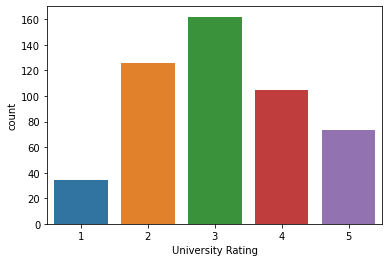

In [8]:
sns.countplot(train_data['University Rating'])

In [9]:
train_data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

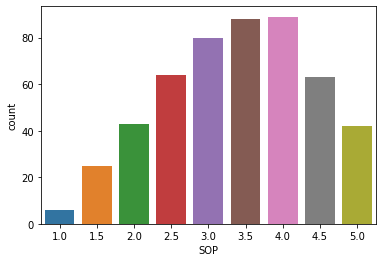

In [10]:
sns.countplot(train_data['SOP'])

In [11]:
train_data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [12]:
train_data = train_data.rename(columns={'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score', 'SOP': 'SOP', 'LOR ': 'LOR','CGPA': 'CGPA', 'Chance of Admit ': 'Chance of Admit'})

In [13]:
train_data['LOR'].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

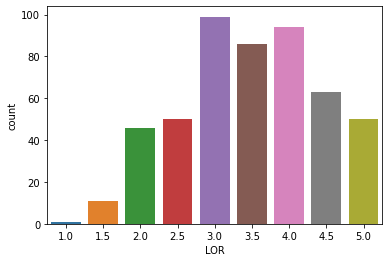

In [14]:
sns.countplot(train_data['LOR'])

In [15]:
train_data['CGPA'].value_counts()

8.00    9
8.76    9
8.54    7
8.45    7
8.56    7
       ..
8.72    1
7.23    1
7.87    1
9.67    1
7.57    1
Name: CGPA, Length: 184, dtype: int64

In [16]:
train_data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

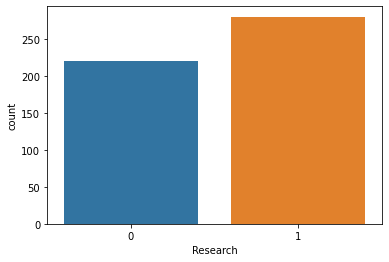

In [17]:
sns.countplot(train_data['Research'])

***Missing Values***

In [18]:
## check if there are any Nan values

train_data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in our data.

In [19]:
train_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0.5, 1.0, 'CGPA vs GRE Score')

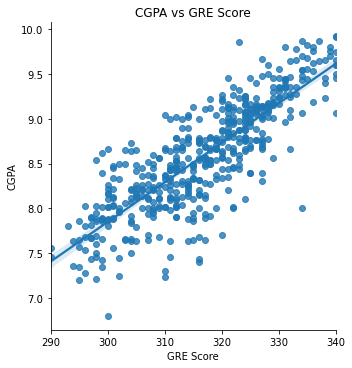

In [20]:
sns.lmplot(x='GRE Score', y='CGPA', data = train_data)
plt.title('CGPA vs GRE Score')


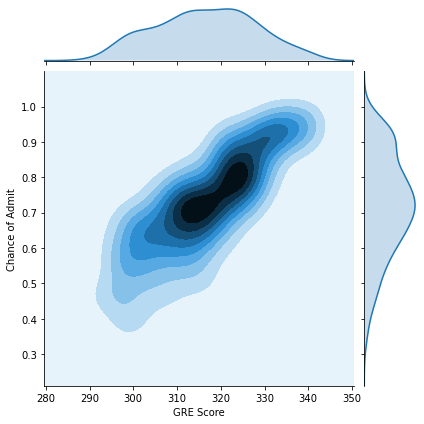

In [21]:
sns.jointplot(x = 'GRE Score', y = 'Chance of Admit', data = train_data, kind = 'kde')

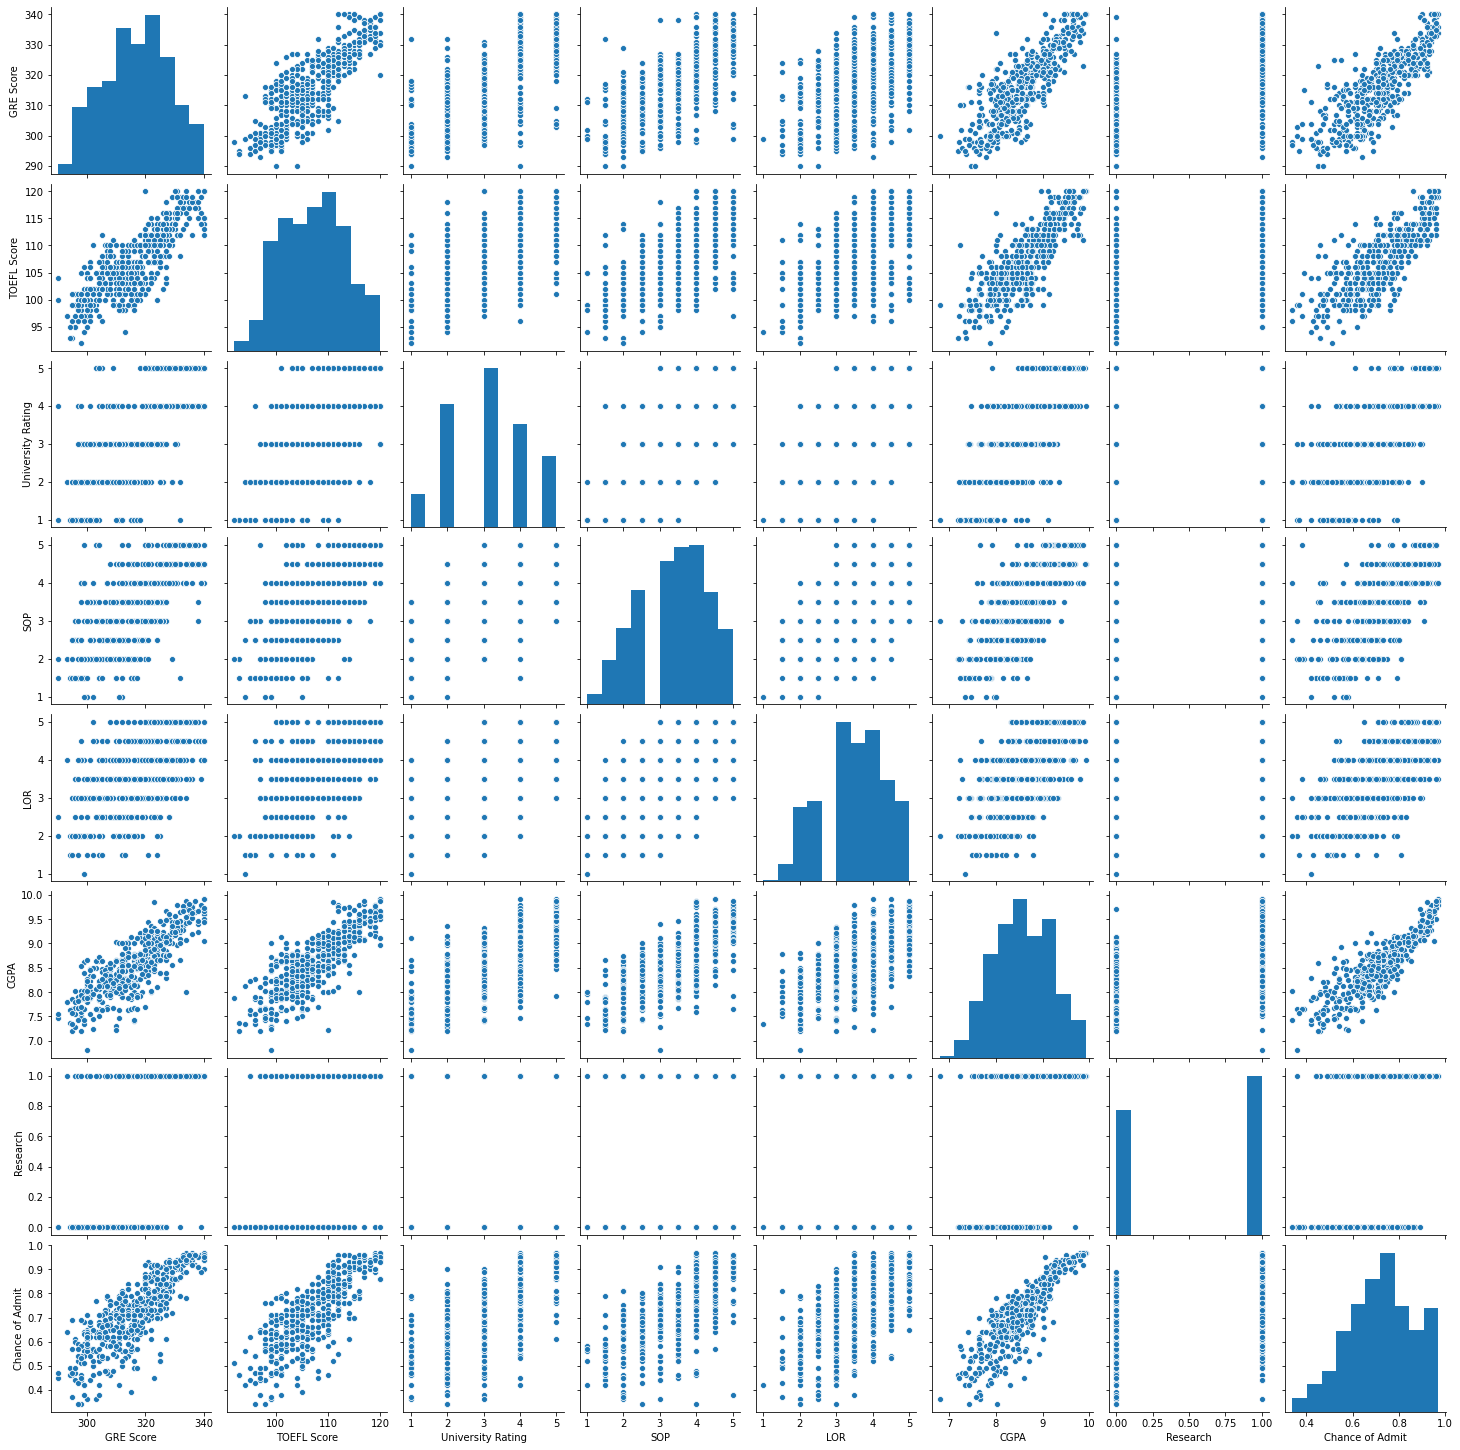

In [22]:
sns.pairplot(train_data)

**Plotting heatmap for the correlations**

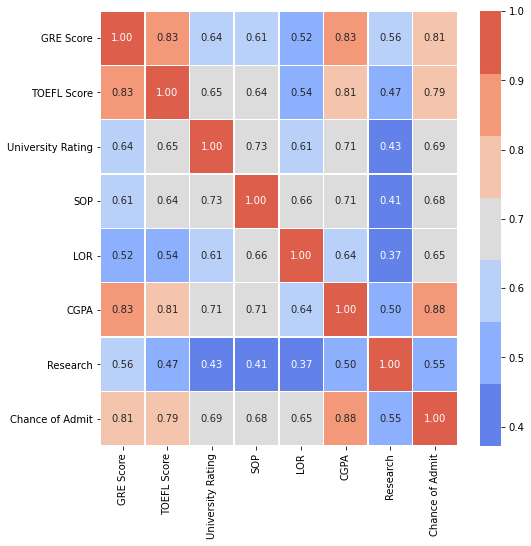

In [23]:
corr = train_data.corr()
plt.figure(figsize=(8,8))
colormap = sns.color_palette("coolwarm", 7)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt = '.2f')

## Model Evaluation

In [24]:
X = train_data.drop(['Chance of Admit'], axis=1)
y = train_data['Chance of Admit']

In [25]:
X.shape

(500, 7)

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Import Libraries

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error

In [29]:
# Create a list of lists which consists of the model name and the model.

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],]

print("Results...")

#Fitting the data for each model

error = []
model_name = []
for name,model in models:
    model = model
    model_name.append(name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, predictions)))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 0.09407443861113389
Linear Regression : 0.06086588041578309
RandomForest : 0.06578143127053405
KNeighbours : 0.08213403679352428
SVM : 0.08473059542351913
AdaBoostClassifier : 0.07145054503243845
GradientBoostingClassifier:  0.06681689392330073
Xgboost:  0.0703773122189062
Lasso:  0.12339761591426397
Ridge:  0.06101083772539083


In [30]:
from sklearn.tree import ExtraTreeRegressor

In [31]:
model_ET = ExtraTreeRegressor()
model_ET.fit(X, y)

ExtraTreeRegressor()

In [32]:
print(model_ET.feature_importances_)

[0.25895325 0.0935698  0.01641514 0.34041929 0.02824519 0.2365173
 0.02588002]


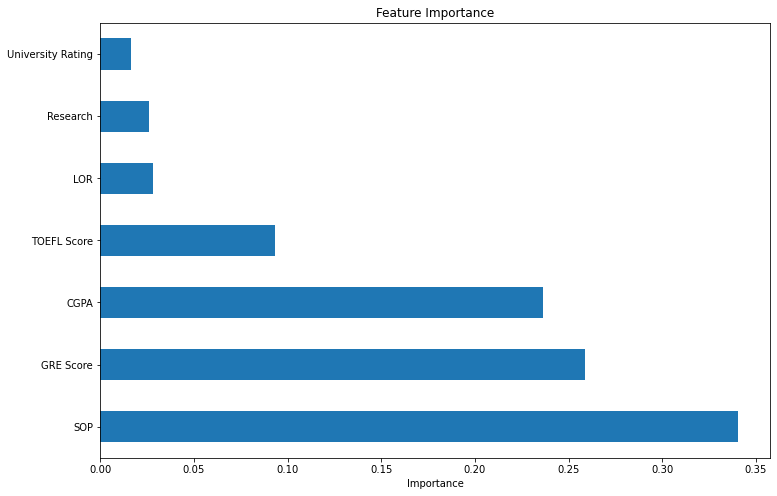

In [33]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model_ET.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [34]:
df = pd.DataFrame({'model' :model_name, 'rmse': error})

In [35]:
df.head()

,model,rmse
0,DecisionTree :,0.094074
1,Linear Regression :,0.060866
2,RandomForest :,0.065781
3,KNeighbours :,0.082134
4,SVM :,0.084731


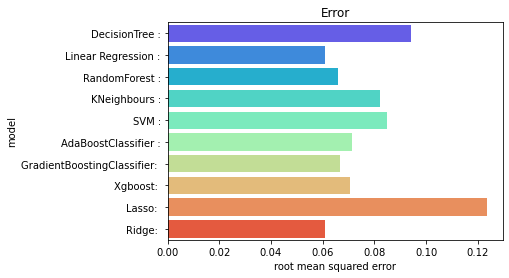

In [36]:
# Plotting the graph for rmse error

g = sns.barplot("rmse", "model", data= df, palette= "rainbow", orient= "h")
g.set_xlabel("root mean squared error")
g = g.set_title("Error")

In [37]:
print("scores for the test data")
test_scores = []
for name,model in models:
    test_scores.append(model.score(X_test, y_test))
    print(name, model.score(X_test, y_test))

scores for the test data
DecisionTree : 0.5672371638141811
Linear Regression : 0.818843256782963
RandomForest : 0.7884011393643033
KNeighbours : 0.6701222493887531
SVM : 0.6489352664633703
AdaBoostClassifier : 0.7503579273627133
GradientBoostingClassifier:  0.7816871729311676
Xgboost:  0.7578011699189534
Lasso:  0.2554048110843906
Ridge:  0.8179793486575074


From the above data it is clear that only ridge and linear regression models are performing better than others.

In [38]:
df['test_score'] = test_scores

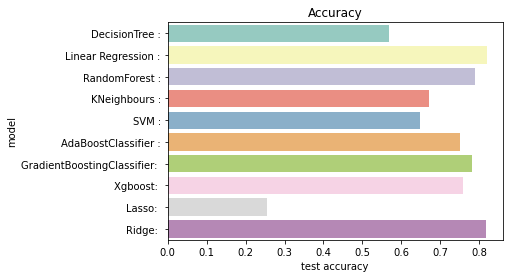

In [39]:
g = sns.barplot("test_score", "model", data= df, palette= "Set3", orient= "h")
g.set_xlabel("test accuracy")
g = g.set_title("Accuracy")

In [40]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)

LinearRegression()

In [41]:
final_model.coef_

array([0.00243444, 0.00299587, 0.0025688 , 0.00181369, 0.01723798,
       0.11252708, 0.02402679])

In [42]:
predictions = final_model.predict(X_test)

In [43]:
print("accuracy : {}".format(final_model.score(X_test,y_test)) )

accuracy : 0.818843256782963


In [44]:
import pickle
filename = 'reg_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [45]:
load_model = pickle.load(open('reg_model.pkl', 'rb'))

In [46]:
result = load_model.score(X_test, y_test)
result

0.818843256782963